<b><div align="center"><font size="+2">PREDICTIVE ANALYTICS ON ELECTRONIC INDUSTRY</b></font>

In this we have mainly focused on the Big Three i,e INDIA,AMERICA,JAPAN.

In [156]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm 

In [77]:
#reading the data 
data=pd.read_csv("/home/saksham/Downloads/M3 project - Sheet1(4).csv")

In [68]:
data.head6()

,HUB(Place),SALARY($),EXPERIENCE(yrs),INDUSTRY-TYPE,POST,WORKING-ENV.
0,Bangalore,"1,497,560",1.0,Core Electronics,Senior Software Engineer,3.5
1,Bangalore,"1,133,953",3.0,Core Electronics,Senior Software Engineer,3.5
2,Bangalore,"1,198,524",4.0,Core Electronics,Senior Software Engineer,3.5
3,Bangalore,"1,374,627",3.0,Core Electronics,Lead Engineer,3.5
4,Bangalore,"1,337,209",6.0,Core Electronics,Lead Engineer,3.5


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
HUB(Place)         223 non-null object
SALARY($)          223 non-null object
EXPERIENCE(yrs)    223 non-null float64
INDUSTRY-TYPE      217 non-null object
POST               223 non-null object
WORKING-ENV.       223 non-null float64
dtypes: float64(2), object(4)
memory usage: 10.6+ KB


<b>HYPOTHESIS WE HAVE CONSIDERED BEFORE TAKING DATA</b> 

<p2>Level of experience determine the income and it is irrespective of the industry</p2>

<p3>Equal % of salary increase in every country according to the experience</p3>

<p4>People earning more in the same profession have to work more</p4>





In [96]:
data['INDUSTRY-TYPE'].describe()

count                  223
unique                  23
top       Core Electronics
freq                    47
Name: INDUSTRY-TYPE, dtype: object

In [53]:
#obseving null values in our data
missing_values_count = data.isnull().sum()
missing_values_count

HUB(Place)         1
SALARY($)          1
EXPERIENCE(yrs)    1
INDUSTRY-TYPE      7
POST               1
WORKING-ENV.       1
dtype: int64

<p1>For numerical variables: imputation using median</p1> 

 <p2>For categorical variables: imputation using mode</p2>

In [81]:
#filling out the cateogarical missing value in our data
data['INDUSTRY-TYPE'].fillna(data['INDUSTRY-TYPE'].mode()[0], inplace=True)

In [80]:
#removing specific values corresponding to the columns
data = data.dropna(axis=0, subset=['HUB(Place)'])
data = data.dropna(axis=0, subset=['SALARY($)'])
data = data.dropna(axis=0, subset=['EXPERIENCE(yrs)'])
data = data.dropna(axis=0, subset=['POST'])
data = data.dropna(axis=0, subset=['WORKING-ENV.'])

In [41]:
#pd.to_numeric(EXPERIENCE(yrs))

In [45]:
+inplace=True)
#data['EXPERIENCE(yrs)'].fillna(data[EXPERIENCE(yrs)].median(), inplace=True)

Now check if there is any missing values in the data

In [82]:
data.isnull().sum()

HUB(Place)         0
SALARY($)          0
EXPERIENCE(yrs)    0
INDUSTRY-TYPE      0
POST               0
WORKING-ENV.       0
dtype: int64

In [89]:
data[["SALARY($)"]] = data[[ "SALARY($)"]].apply(pd.to_numeric)

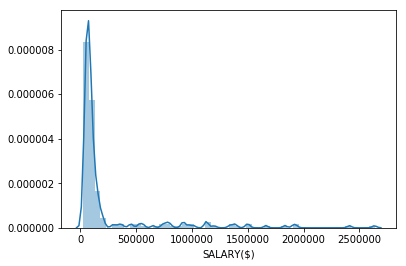

In [93]:
sns.distplot(data['SALARY($)'])

WE HAVE CONVERTED IT INTO LOG SO THAT IT APPEARS MORE LIKE NORMAL CURVE

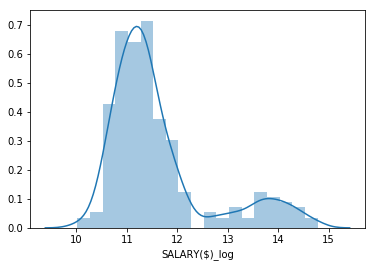

In [263]:
data['SALARY($)_log'] = np.log(data['SALARY($)'])
sns.distplot(data['SALARY($)_log']); 

<h1>ANALYSIS OF FEATURES</H1>

 FIRST WE ARE CATEOGARIZING THE INDUSTRY TYPE IN WHICH THE INDIVIDUAL IS WORKING

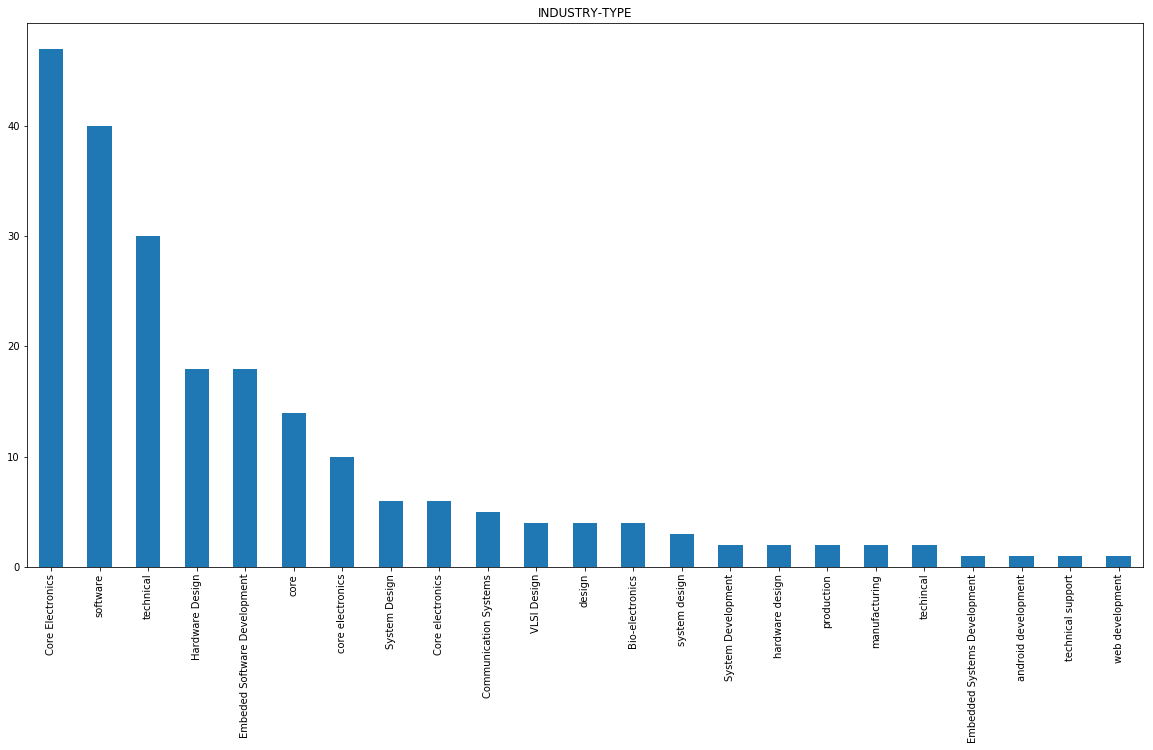

In [95]:
data['INDUSTRY-TYPE'].value_counts().plot.bar(figsize=(20,10), title='INDUSTRY-TYPE')

LET'S TAKE A LOOK AT THE DIST. OF WORKING ENVIRONMENT AND EXPERIENCE OF PEOPLE 

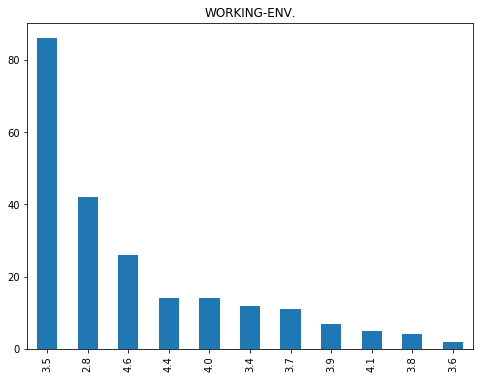

In [103]:
data['WORKING-ENV.'].value_counts().plot.bar(figsize=(8,6), title='WORKING-ENV.')

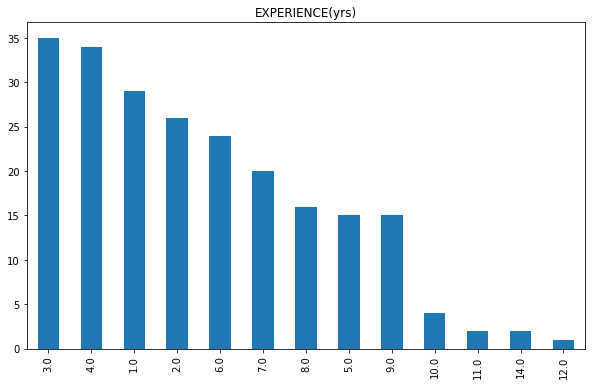

In [100]:
data['EXPERIENCE(yrs)'].value_counts().plot.bar(figsize=(10,6), title='EXPERIENCE(yrs)')

NOW WE WISH TO SEE THE ABNORMALITIES IN THE DATA

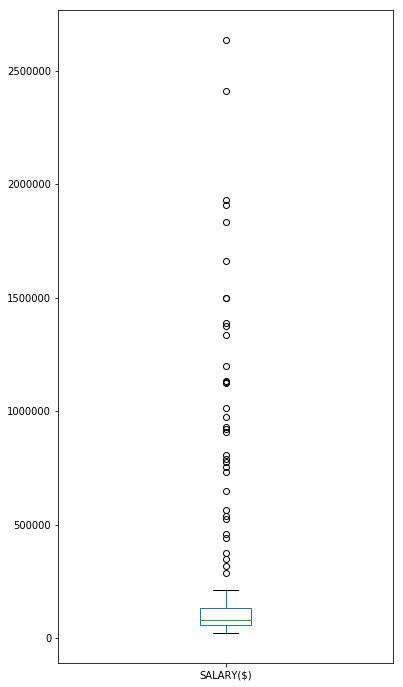

In [109]:
data['SALARY($)'].plot.box(figsize=(6,12)) 

NOW WE ARE GOING TO MAKE GROUPS/BINS SO THAT WE PUT THEM INTO CERTAIN CRITERIA

In [119]:
m1=data['SALARY($)'].min()
m1

22359.9

In [120]:
m2=data['SALARY($)'].max()
m2

2634701.0

In [121]:
m3=(m2-m1)/4
m3

653085.275

In [122]:
bins=[0,660000,1300000,1900000,2700000] 
group=['Low','Average','High', 'Very high'] 
data['Income_bin']=pd.cut(data['SALARY($)'],bins,labels=group)

Text(0, 0.5, 'Percentage')

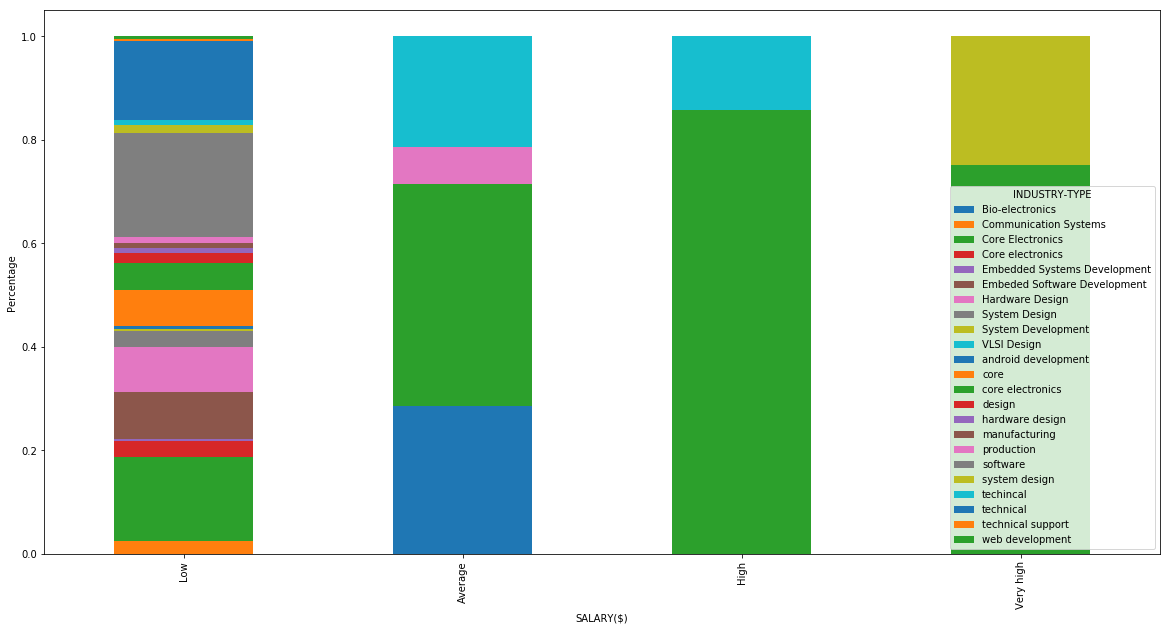

In [124]:
Income_bin=pd.crosstab(data['Income_bin'],data['INDUSTRY-TYPE']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(figsize=(20,10),kind="bar", stacked=True)
plt.xlabel('SALARY($)')
plt.ylabel('Percentage')

In [128]:
#data_b=data.loc[[2:35]]

In [131]:
#data_b=data.loc[data['HUB(Place)'] =='Banglore']

In [137]:
#data_=data.loc[data['HUB(Place)'].isin('Banglore')]

Selecting subsets of the data so that we can compare the data 

In [140]:
data_b=data.iloc[1:33]

In [149]:
data_b.head(2)

,HUB(Place),SALARY($),EXPERIENCE(yrs),INDUSTRY-TYPE,POST,WORKING-ENV.,Income_bin
1,Bangalore,1133953.0,3.0,Core Electronics,Senior Software Engineer,3.5,Average
2,Bangalore,1198524.0,4.0,Core Electronics,Senior Software Engineer,3.5,Average


In [146]:
data_t=data.iloc[91:225]

In [148]:
data_t.head(2)

,HUB(Place),SALARY($),EXPERIENCE(yrs),INDUSTRY-TYPE,POST,WORKING-ENV.,Income_bin
92,tokyo,95241.93,4.0,technical,manager,3.5,Low
93,tokyo,210778.53,8.0,technical,director,3.5,Low


In [150]:
data_c=data.iloc[62:89]

In [152]:
data_c.head(2)

,HUB(Place),SALARY($),EXPERIENCE(yrs),INDUSTRY-TYPE,POST,WORKING-ENV.,Income_bin
62,Cupertino,140000.0,4.0,Hardware Design,Hardware Design Engineer,4.0,Low
63,Cupertino,130000.0,3.0,Core Electronics,RF Design Engineer,4.0,Low


In [154]:
data=data.drop(['Income_bin'],axis=1)

<b> How a confusion matrix looks like</b>

<img src="https://s3.amazonaws.com/thinkific/file_uploads/118220/images/4a8/08f/c76/1549257180501.jpg">


    True Positive - Targets which are actually true(Y) and we have predicted 
    them true(Y)
    True Negative - Targets which are actually false(N) and we have predicted
    them false(N)
    False Positive - Targets which are actually false(N) but we have predicted
    them true(T)
    False Negative - Targets which are actually true(T) but we have predicted 
    them false(N)

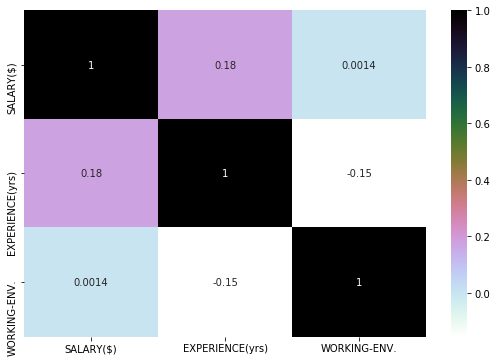

In [155]:
#it only takes into amount the numerical values
plt.figure(figsize=(9,6)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [ ]:
#segregating the data applying linear regression the three and comparing the result 

In [235]:
#data_c=data_c.drop(['Income_bin'],axis=1)

In [205]:
X = data_b.drop('Income',1)
y = data_b.Income

In [231]:
#renaming column because python interpret dollar as function
data_b.rename(columns={'SALARY($)':'Income'}, inplace=True)
data_c.rename(columns={'SALARY($)':'Income'}, inplace=True)
data_t.rename(columns={'SALARY($)':'Income'}, inplace=True)

In [232]:
X=pd.get_dummies(X) 
data_b=pd.get_dummies(data_b)
data_c=pd.get_dummies(data_c)
data_t=pd.get_dummies(data_t)

In [209]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [210]:
data_b.describe()


,Income,EXPERIENCE(yrs),WORKING-ENV.,HUB(Place)_Bangalore,INDUSTRY-TYPE_Bio-electronics,INDUSTRY-TYPE_Core Electronics,INDUSTRY-TYPE_Embeded Software Development,INDUSTRY-TYPE_Hardware Design,INDUSTRY-TYPE_System Design,INDUSTRY-TYPE_System Development,...,POST_Senior Engineer,POST_Senior Software Engineer,POST_Software Archietct,POST_Software Engineer,POST_Technical Lead,POST_Technical Specialist,Income_bin_Low,Income_bin_Average,Income_bin_High,Income_bin_Very high
count,3.200000e+01,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1.070186e+06,4.812500,3.587500,1.0,0.093750,0.500000,0.062500,0.093750,0.093750,0.031250,...,0.062500,0.093750,0.031250,0.031250,0.062500,0.093750,0.281250,0.406250,0.187500,0.125000
std,5.957147e+05,3.105017,0.166074,0.0,0.296145,0.508001,0.245935,0.296145,0.296145,0.176777,...,0.245935,0.296145,0.176777,0.176777,0.245935,0.296145,0.456803,0.498991,0.396558,0.336011
min,2.870000e+05,1.000000,3.400000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.288088e+05,3.000000,3.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.271275e+05,4.000000,3.500000,1.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.378632e+06,7.000000,3.700000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2.634701e+06,14.000000,3.900000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
model=sm.OLS(y,X)

In [221]:
fit=model.fit()

 <h1>THIS DATA ANALYSIS IS FOR THE BANGLORE REGION</h1>

In [222]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     72.58
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.51e-09
Time:                        19:15:03   Log-Likelihood:                -394.37
No. Observations:                  32   AIC:                             828.7
Df Residuals:                      12   BIC:                             858.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
EXPERIENCE(yrs)                              2.62e+04   1.42e+04      1.850      0.089   -4663.025    5.71e+04
WORKING-ENV.                               -4.091e+05   1.69e+06     -0.243      0.812   -4.08e+06    3.27e+06
HUB(Place)_Bangalore                        1.697e+06   3.97e+06      0.427      0.677   -6.96e+06    1.04e+07
INDUSTRY-TYPE_Bio-electronics               1.708e+05   2.94e+05      0.580      0.572    -4.7e+05    8.12e+05
INDUSTRY-TYPE_Core Electronics              4.753e+05   9.43e+05      0.504      0.623   -1.58e+06    2.53e+06
INDUSTRY-TYPE_Embeded Software Development  1.866e+05    7.5e+05      0.249      0.808   -1.45e+06    1.82e+06
INDUSTRY-TYPE_Hardware Design               1.023e+05   1.29e+05      0.794      0.443   -1.79e+05    3.83e+05
INDUSTRY-TYPE_System Design                -4.053e+04      3e+05     -0.135      0.895   -6.94e+05    6.13e+05
INDUSTRY-TYPE_System Development            4.356e+05   6.15e+05      0.708      0.492   -9.05e+05    1.78e+06
INDUSTRY-TYPE_VLSI Design                   3.672e+05   9.69e+05      0.379      0.711   -1.74e+06    2.48e+06
POST_Deputy Engineer                        5255.0397   7.28e+05      0.007      0.994   -1.58e+06    1.59e+06
POST_Design Engineer                        2.326e+05   7.04e+05      0.331      0.747    -1.3e+06    1.77e+06
POST_Engineer                                969.7121   1.23e+05      0.008      0.994   -2.67e+05    2.68e+05
POST_Lead Engineer                         -1.079e+05   9.15e+04     -1.179      0.261   -3.07e+05    9.14e+04
POST_Production Engineer                    1.866e+05    7.5e+05      0.249      0.808   -1.45e+06    1.82e+06
POST_Project Manager                        5.169e+05   3.35e+05      1.541      0.149   -2.14e+05    1.25e+06
POST_Senior Engineer                       -5.733e+04    7.4e+05     -0.077      0.940   -1.67e+06    1.56e+06
POST_Senior Software Engineer               1.853e+05   9.11e+04      2.033      0.065   -1.33e+04    3.84e+05
POST_Software Archietct                     4.356e+05   6.15e+05      0.708      0.492   -9.05e+05    1.78e+06
POST_Software Engineer                      1.577e+05   1.44e+05      1.095      0.295   -1.56e+05    4.72e+05
POST_Technical Lead                         2.141e+05   1.11e+05      1.932      0.077   -2.74e+04    4.56e+05
POST_Technical Specialist                  -7.256e+04      1e+05     -0.724      0.483   -2.91e+05    1.46e+05
Income_bin_Low                              -1.49e+05   9.46e+05     -0.157      0.878   -2.21e+06    1.91e+06
Income_bin_Average                          1.316e+05   9.53e+05      0.138      0.892   -1.95e+06    2.21e+06
Income_bin_High                             6.224e+05      1e+06      0.620      0.547

In [251]:
#data_b=data_b.drop(['INDUSTRY-TYPE'])

In [236]:
X = data_c.drop('Income',1)
y = data_c.Income

In [237]:
X=pd.get_dummies(X) 

In [238]:
data_c.describe()

,Income,EXPERIENCE(yrs),WORKING-ENV.,HUB(Place)_Cupertino,HUB(Place)_Mountain View,HUB(Place)_tokyo,INDUSTRY-TYPE_Communication Systems,INDUSTRY-TYPE_Core Electronics,INDUSTRY-TYPE_Embeded Software Development,INDUSTRY-TYPE_Hardware Design,...,POST_Senior Systems Engineer,POST_Signal Design Engineer,POST_Software Engineer,POST_Software Systems Engineer,POST_Test Engineer,POST_director,Income_bin_Low,Income_bin_Average,Income_bin_High,Income_bin_Very high
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.0,27.0,27.0
mean,128615.358148,3.962963,4.200000,0.444444,0.518519,0.037037,0.185185,0.370370,0.074074,0.222222,...,0.037037,0.074074,0.074074,0.037037,0.074074,0.037037,1.0,0.0,0.0,0.0
std,38520.076427,2.488149,0.214834,0.506370,0.509175,0.192450,0.395847,0.492103,0.266880,0.423659,...,0.192450,0.266880,0.266880,0.192450,0.266880,0.192450,0.0,0.0,0.0,0.0
min,51000.000000,1.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
25%,102500.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
50%,130000.000000,3.000000,4.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
75%,150000.000000,5.500000,4.400000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
max,200000.000000,9.000000,4.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0


In [245]:
fit_c=model.fit()

In [243]:
model=sm.OLS(y,X)

<h1>THIS DATA ANALYSIS IS FOR THE US REGION</h1>

In [246]:
fit_c.summary()


/home/saksham/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/saksham/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/saksham/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/saksham/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                 -0.623
Method:                 Least Squares   F-statistic:                    0.5461
Date:                Mon, 29 Apr 2019   Prob (F-statistic):              0.841
Time:                        02:34:56   Log-Likelihood:                -304.17
No. Observations:                  27   AIC:                             654.3
Df Residuals:                       4   BIC:                             684.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
EXPERIENCE(yrs)                             1.362e+04   9051.204      1.505      0.207   -1.15e+04    3.87e+04
WORKING-ENV.                                1.857e+04   7952.914      2.335      0.080   -3510.460    4.07e+04
HUB(Place)_Cupertino                        1.384e+04   1.89e+04      0.731      0.506   -3.88e+04    6.64e+04
HUB(Place)_Mountain View                     -2.8e+04   1.71e+04     -1.638      0.177   -7.55e+04    1.95e+04
HUB(Place)_tokyo                            2.274e+04   1.45e+04      1.567      0.192   -1.75e+04     6.3e+04
INDUSTRY-TYPE_Communication Systems         -4.56e+04   6.69e+04     -0.682      0.533   -2.31e+05     1.4e+05
INDUSTRY-TYPE_Core Electronics              1.807e+04   3.16e+04      0.572      0.598   -6.96e+04    1.06e+05
INDUSTRY-TYPE_Embeded Software Development -1.055e+04    5.9e+04     -0.179      0.867   -1.74e+05    1.53e+05
INDUSTRY-TYPE_Hardware Design                912.0586   3.79e+04      0.024      0.982   -1.04e+05    1.06e+05
INDUSTRY-TYPE_System Design                   2.3e+04   2.02e+04      1.141      0.318    -3.3e+04     7.9e+04
INDUSTRY-TYPE_technical                     2.274e+04   1.45e+04      1.567      0.192   -1.75e+04     6.3e+04
POST_ASIC Design Engineer                   2.161e+04   5.41e+04      0.399      0.710   -1.29e+05    1.72e+05
POST_Circuit Design Engineer               -6.924e+04   5.53e+04     -1.252      0.279   -2.23e+05    8.43e+04
POST_Design Engineer                        -2.99e+04   3.64e+04     -0.822      0.457   -1.31e+05    7.11e+04
POST_Development Engineer                   1.747e+04   3.75e+04      0.466      0.666   -8.67e+04    1.22e+05
POST_Field Test Engineer                    2463.6647   7.89e+04      0.031      0.977   -2.17e+05    2.22e+05
POST_Hardware Design Engineer              -1.209e+04   6.19e+04     -0.195      0.855   -1.84e+05     1.6e+05
POST_IC Design Engineer                    -7.733e+04   8.09e+04     -0.956      0.393   -3.02e+05    1.47e+05
POST_Lead Hardware Engineer                 1.424e+04   7.97e+04      0.179      0.867   -2.07e+05    2.36e+05
POST_Lead Software Engineer                -6212.5943   8.54e+04     -0.073      0.946   -2.43e+05    2.31e+05
POST_RF Design Engineer                    -2.563e+04   5.34e+04     -0.480      0.656   -1.74e+05    1.23e+05
POST_Radar Systems Engineer                  9.97e+04   8.91e+04      1.118      0.326   -1.48e+05    3.47e+05
POST_Senior Software Engineer               1551.3037   6.42e+04      0.024      0.982   -1.77e+05     1.8e+05
POST_Senior Systems Engineer               -5626.5904   6.93e+04     -0.081      0.939   -1.98e+05    1.87e+05
POST_Signal Design Engineer                -8390.4883   4.06e+04     -0.207      0.846

In [252]:
data_t.describe()

,Income,EXPERIENCE(yrs),WORKING-ENV.,HUB(Place)_tokyo,INDUSTRY-TYPE_Core Electronics,INDUSTRY-TYPE_Core electronics,INDUSTRY-TYPE_Embeded Software Development,INDUSTRY-TYPE_Hardware Design,INDUSTRY-TYPE_System Development,INDUSTRY-TYPE_android development,...,POST_software engineer,POST_staff project manager,POST_systems administrator,POST_systems manager,POST_technical support engineer,POST_web applications engineer,Income_bin_Low,Income_bin_Average,Income_bin_High,Income_bin_Very high
count,132.000000,132.000000,132.000000,132.0,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.0,132.0,132.0,132.0
mean,71040.482576,4.840909,3.313636,1.0,0.151515,0.045455,0.098485,0.068182,0.007576,0.007576,...,0.022727,0.007576,0.007576,0.007576,0.007576,0.007576,1.0,0.0,0.0,0.0
std,29016.757130,2.814438,0.376560,0.0,0.359916,0.209092,0.299104,0.253018,0.087039,0.087039,...,0.149600,0.087039,0.087039,0.087039,0.087039,0.087039,0.0,0.0,0.0,0.0
min,27180.600000,1.000000,2.800000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
25%,50685.282500,3.000000,2.800000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
50%,64960.890000,4.000000,3.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
75%,84283.245000,7.000000,3.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
max,210778.530000,14.000000,4.100000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0


In [253]:
X = data_t.drop('Income',1)
y = data_t.Income

In [254]:
X=pd.get_dummies(X)

In [258]:
fit_t=model.fit()

In [260]:
model=sm.OLS(y,X)

<h1>This Data Analysis is for Tokyo Region</h1>

In [261]:
fit_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     3.615
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.60e-07
Time:                        02:54:09   Log-Likelihood:                -1474.6
No. Observations:                 132   AIC:                             3039.
Df Residuals:                      87   BIC:                             3169.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
EXPERIENCE(yrs)                              186.9322    834.138      0.224      0.823   -1471.008    1844.873
WORKING-ENV.                                3.811e+04   1.07e+04      3.572      0.001    1.69e+04    5.93e+04
HUB(Place)_tokyo                           -1.645e+04   1.73e+04     -0.948      0.346   -5.09e+04     1.8e+04
INDUSTRY-TYPE_Core Electronics              -4.23e+04   2.08e+04     -2.036      0.045   -8.36e+04   -1005.160
INDUSTRY-TYPE_Core electronics              4.697e+04   1.55e+04      3.035      0.003    1.62e+04    7.77e+04
INDUSTRY-TYPE_Embeded Software Development -4.887e+04   1.42e+04     -3.453      0.001    -7.7e+04   -2.07e+04
INDUSTRY-TYPE_Hardware Design              -5.812e+04   2.45e+04     -2.372      0.020   -1.07e+05   -9424.601
INDUSTRY-TYPE_System Development           -2.938e+04    1.1e+04     -2.673      0.009   -5.12e+04   -7533.997
INDUSTRY-TYPE_android development          -1.248e+04    1.1e+04     -1.133      0.260   -3.44e+04    9414.960
INDUSTRY-TYPE_core                          3793.0276   1.35e+04      0.282      0.779    -2.3e+04    3.06e+04
INDUSTRY-TYPE_core electronics              3.936e+04   1.08e+04      3.631      0.000    1.78e+04    6.09e+04
INDUSTRY-TYPE_design                         4.53e+04   1.65e+04      2.748      0.007    1.25e+04    7.81e+04
INDUSTRY-TYPE_manufacturing                 4.942e+04   1.69e+04      2.933      0.004    1.59e+04    8.29e+04
INDUSTRY-TYPE_software                       1.67e+04   9468.521      1.764      0.081   -2117.023    3.55e+04
INDUSTRY-TYPE_technical                     3.239e+04   1.05e+04      3.092      0.003    1.16e+04    5.32e+04
INDUSTRY-TYPE_technical support             -3.15e+04    1.1e+04     -2.851      0.005   -5.35e+04   -9543.045
INDUSTRY-TYPE_web development              -2.773e+04   1.09e+04     -2.542      0.013   -4.94e+04   -6051.382
POST_Application engineer                   2.165e+04   1.99e+04      1.086      0.281    -1.8e+04    6.13e+04
POST_Consultant                            -3.004e+04   2.17e+04     -1.385      0.169   -7.31e+04    1.31e+04
POST_Director                               5629.0861   2.42e+04      0.232      0.817   -4.26e+04    5.38e+04
POST_Engineer                              -5.269e+04   2.18e+04     -2.419      0.018    -9.6e+04   -9400.078
POST_IT engineer                            -3.15e+04    1.1e+04     -2.851      0.005   -5.35e+04   -9543.045
POST_Program manager                        1.207e+04   2.63e+04      0.459      0.647   -4.02e+04    6.43e+04
POST_Research engineer                      2465.1843   2.74e+04      0.090      0.928    -5.2e+04    5.69e+04
POST_Senior Consultant                     -5.515e+04   2.19e+04     -2.517      0.014

ROC curve
    Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and 
    false positive rate(1- specificity).
    
   The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.


<img src="https://s3.amazonaws.com/thinkific/file_uploads/118220/images/681/073/341/1549257180687.jpg">

The area of this curve measures the ability of the model to correctly classify true positives and true negatives.

<h1>CONCLUSIONS</H1>

Level of experience do determine the deviation in the income but it is with respect to the industry according to the data provided.


Percentage of salary increase is not equal in every country as seen from the data provided.
When we come across the visualization part we notice that the rate of increase is highest in US and in tokyo is the lowest


People earning more in the same profession have to work more .It is not probably the case as by searching through the net.We made a general hypothesis that the working hours or we can say ethics depends broadly on the region.
for instance in our case toyko has the most workaholic environment but its a matter of surprise that most people do give almost a 4 out of 5 for company's environment.